<a href="https://colab.research.google.com/github/Nathanael-14/DeviceManager/blob/main/FruitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive


In [ ]:
drive.mount('/content/gdrive')

#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

#Download and unzip dataset
#!kaggle datas[]ets download -d moltean/fruits
#!unzip \*.zip && rm *.zip

MessageError: ignored

In [ ]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('./fruits-360_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Streaming output truncated to the last 5000 lines.
./fruits-360_dataset/fruits-360/Training/Mango/r_68_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_6_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_69_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_70_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_71_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_72_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_73_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_75_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_74_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_76_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_77_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_7_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_80_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_92_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_8_100.jpg
./fruits-360_dataset/fruits-360/Training/Mango/r_93_

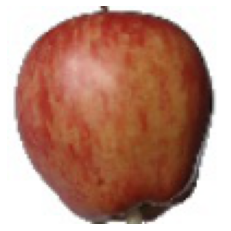

(100, 100, 3)


In [ ]:
#Setting Training & Test dir paths
train_path = './fruits-360_dataset/fruits-360/Training/'
test_path = './fruits-360_dataset/fruits-360/Test/'

#Displaying the image
img = load_img(train_path + "Apple Red 1/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)


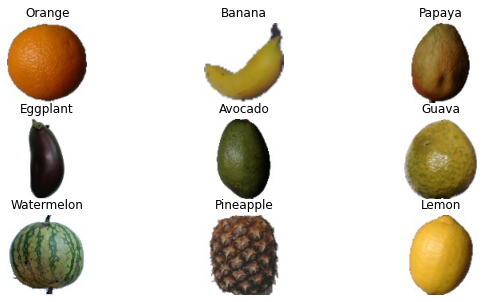

In [ ]:
#Visualizing more Images
images = ['Orange', 'Banana', 'Papaya', 'Eggplant', 'Avocado', 'Guava', 'Watermelon','Pineapple', 'Lemon']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

In [ ]:
#Storing and Listing the occurences of fruits
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i) 
        fruits_image.append(i + '/' + image_filename)

#Finding top 10 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(10)
print("Top 10 frequent Fruits:")
frequent_fruits

Top 10 frequent Fruits:


[('Apple Red 1', 492),
 ('Lemon', 492),
 ('Papaya', 492),
 ('Peach', 492),
 ('Pear', 492),
 ('Rambutan', 492),
 ('Strawberry', 492),
 ('Banana', 490),
 ('Cocos', 490),
 ('Guava', 490)]

In [ ]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print("Number of Class =", number_of_class)

Number of Class = 20


In [ ]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

In [ ]:
#Specifying epochs & batch size
epochs = 47
batch_size = 20

In [ ]:
#Creating an object of ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

#Generating batches of Augmented data
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 9668 images belonging to 20 classes.
Found 3246 images belonging to 20 classes.


In [ ]:
#Training the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/47
80/80 [==============================] - 550s 7s/step - loss: 2.1186 - accuracy: 0.3425 - val_loss: 0.5644 - val_accuracy: 0.9025
Epoch 2/47
80/80 [==============================] - 426s 5s/step - loss: 0.7452 - accuracy: 0.7681 - val_loss: 0.5309 - val_accuracy: 0.8188
Epoch 3/47
80/80 [==============================] - 378s 5s/step - loss: 0.4133 - accuracy: 0.8631 - val_loss: 0.1082 - val_accuracy: 0.9600
Epoch 4/47
80/80 [==============================] - 290s 4s/step - loss: 0.2774 - accuracy: 0.9206 - val_loss: 0.4929 - val_accuracy: 0.8712
Epoch 5/47
80/80 [==============================] - 239s 3s/step - loss: 0.2481 - accuracy: 0.9237 - val_loss: 0.0937 - val_accuracy: 0.9675
Epoch 6/47
80/80 [==============================] - 188s 2s/step - loss: 0.1521 - accuracy: 0.9563 - val_loss: 0.0616 - val_accuracy: 0.9737
Epoch 7/47
80/80 [==============================] - 147s 2s/step - loss: 0.1601 - accuracy: 0.9581 - val_loss: 0.0352 - val_accuracy: 0.9900
Epoch 8/47
80

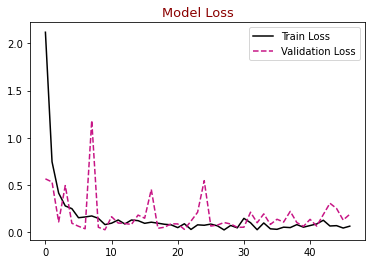

In [ ]:
#Plotting train & validation loss
plt.figure()

plt.plot(hist.history["loss"],label = "Train Loss", color = "black")

plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)

plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

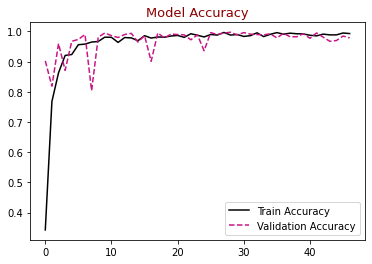

In [ ]:
#Plotting train & validation accuracy
plt.figure()

plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")

plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)

plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

** **
**Prediction of Fruit Class**

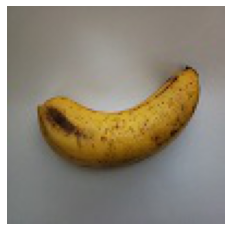

AttributeError: ignored

In [ ]:
#Displaying the selected image
img = load_img(test_path + "/Watermelon/PredictThisFruit.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('./fruits-360_dataset/fruits-360/Test/Watermelon/PredictThisFruit.jpg')

In [ ]:
#Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
print("Prediction =", prediction)

Prediction = [2]


In [ ]:
#Printing class dictionary
print(test_generator.class_indices)

{'Apple Red 1': 0, 'Avocado': 1, 'Banana': 2, 'Cocos': 3, 'Eggplant': 4, 'Guava': 5, 'Kiwi': 6, 'Lemon': 7, 'Limes': 8, 'Mango': 9, 'Orange': 10, 'Papaya': 11, 'Peach': 12, 'Pear': 13, 'Pineapple': 14, 'Rambutan': 15, 'Raspberry': 16, 'Strawberry': 17, 'Tomato 4': 18, 'Watermelon': 19}
